In [25]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
import pandas as pd


In [30]:
x = [0.50, 0.75, 1.00, 1.25, 1.50, 1.75, 1.75, 2.00, 2.25, 2.50, 2.75, 3.00, 3.25, 3.50, 4.00, 4.25, 4.50, 4.75, 5.00, 5.50]
y = [0,    0,    0,    0,    0,    0,    1,    0,    1,    0,    1,    0,    1,    0,    1,    1,    1,    1,    1,    1]

X_test = [0, 1, 2, 3, 4, 5]

In [41]:
X = sm.add_constant(x)

logit = sm.Logit(y,X).fit_regularized()
proba = (logit.predict(X))

# estimate confidence interval for predicted probabilities
cov = logit.cov_params()
gradient = (proba * (1 - proba) * X.T).T # matrix of gradients for each observation
std_errors = np.array([np.sqrt(np.dot(np.dot(g, cov), g)) for g in gradient])

c = 1.96 # multiplier for confidence interval
upper = np.maximum(0, np.minimum(1, proba + std_errors * c))
lower = np.maximum(0, np.minimum(1, proba - std_errors * c))


Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.4014939232249575
            Iterations: 14
            Function evaluations: 14
            Gradient evaluations: 14


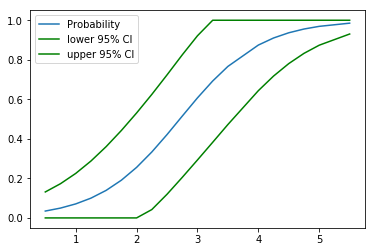

In [39]:
plt.plot(x, proba, label ='Probability')
plt.plot(x, lower, color='g',label='lower 95% CI')
plt.plot(x, upper, color='g', label = 'upper 95% CI')
plt.legend()
plt.show()

### Generate Random values


In [ ]:
rnd_hrs = np.random.uniform(0,5,10000)
rnd_hrs = np.sort(rnd_hrs,axis=0)
rnd_X = sm.add_constant(rnd_hrs)
rnd_proba = (logit.predict(rnd_X))
print(rnd_proba)
i = 0
for item in rnd_proba:
    if item<0.5:
        rnd_proba[i] = 0
    else:
        item = rnd_proba[i] = 1
    i += 1

print(rnd_proba,rnd_hrs)

In [ ]:

preds = []
for i in range(1000):
    boot_idx = np.random.choice(len(rnd_X), replace=True, size=len(rnd_X))
    Y=[]
    for i in boot_idx:
        Y.append(rnd_proba[i])
    try:
        model = sm.Logit(Y, rnd_X[boot_idx]).fit_regularized()
        sorted = np.sort(rnd_X[boot_idx],axis=0)      
        preds.append(logit.predict(sorted))
    except:
        pass
    

# print(preds)

In [ ]:

p = np.array(preds)
plt.plot(rnd_X[:, 1], np.percentile(p, 95, axis=0),color='g',label='upper 95% CI')
plt.plot(rnd_X[:, 1], np.percentile(p, 5, axis=0),color='r',label='lower 95% CI')
plt.legend()
plt.show()
